# ARIMA Library for TA

## Import Packages 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
# from statsmodels.api.tsa.arima_model import ARIMA
from math import sqrt
import yfinance as yf

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Change The Indicators here!

In [124]:
# name_dataset = 'GGRM-long'

p = 2
d = 1
q = 1

start_date = '2017-01-01'

end_date = '2017-12-31'
symbol_dataset = 'UNVR.jk'
column_dataset_obs = 'Close'

# arr_end_date = [ '2021-12-31' , '2017-12-31' , '2017-03-30' ]
# arr_symbol_dataset = ['UNVR.jk', 'GGRM.jk', 'PSDN.jk']

## read Dataset

[*********************100%***********************]  1 of 1 completed


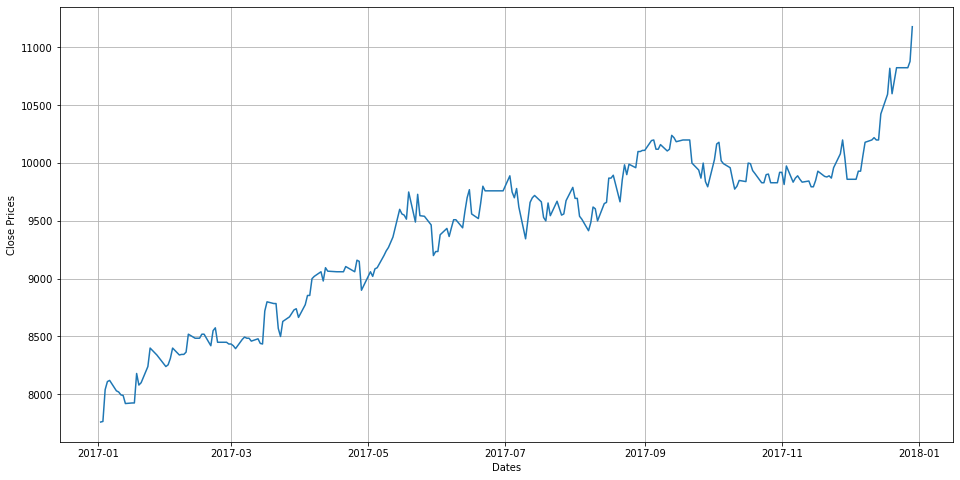

In [125]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# data = pd.read_csv('../Datasets/'+name_dataset+'.csv', 
#                    sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data = yf.download(symbol_dataset, start=start_date, end=end_date)
data

if data.shape[0]>=1250:
    term_status = "long"
elif data.shape[0]>=250:
    term_status = "mid"
else:
    term_status = "short"
    
# data = pd.read_csv('../Datasets/'+name_dataset+'.csv')
#data = data.loc['2012-11-10':'2017-11-10']
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel(column_dataset_obs+' Prices')
plt.plot(data[column_dataset_obs])

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2017-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       254 non-null    float64
 1   High       254 non-null    float64
 2   Low        254 non-null    float64
 3   Close      254 non-null    float64
 4   Adj Close  254 non-null    float64
 5   Volume     254 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


## Splitting Data

In [127]:
train_data, test_data = data[0:int((len(data)-1)*0.8)], data[int((len(data)+1)*0.8):]

## Plotting Data

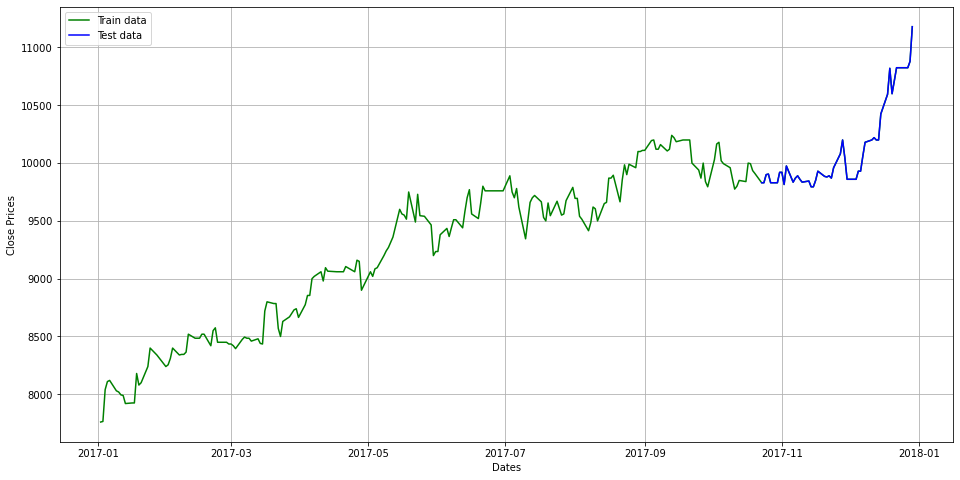

In [128]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel(column_dataset_obs+' Prices')
plt.plot(data[column_dataset_obs], 'green', label='Train data')
plt.plot(test_data[column_dataset_obs], 'blue', label='Test data')
plt.legend()

In [129]:
print("Jumlah Train Data: " + str(len(train_data)))
print("Jumlah Test Data: " + str(len(test_data)))

Jumlah Train Data: 202
Jumlah Test Data: 50


## ARIMA Model

In [130]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 14, 8
# data_arima = data['Open']
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=30)
# plt.figure(figsize=(16,8))
# fig = result.plot()
# plt.show()

In [131]:
train_arima = train_data[column_dataset_obs]
test_arima = test_data[column_dataset_obs]

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = sm.tsa.arima.ARIMA(history, order=(p,d,q))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = sm.tsa.arima.ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

C:\Users\yoela\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\yoela\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [132]:
model

### Plotting Prediction of ARIMA

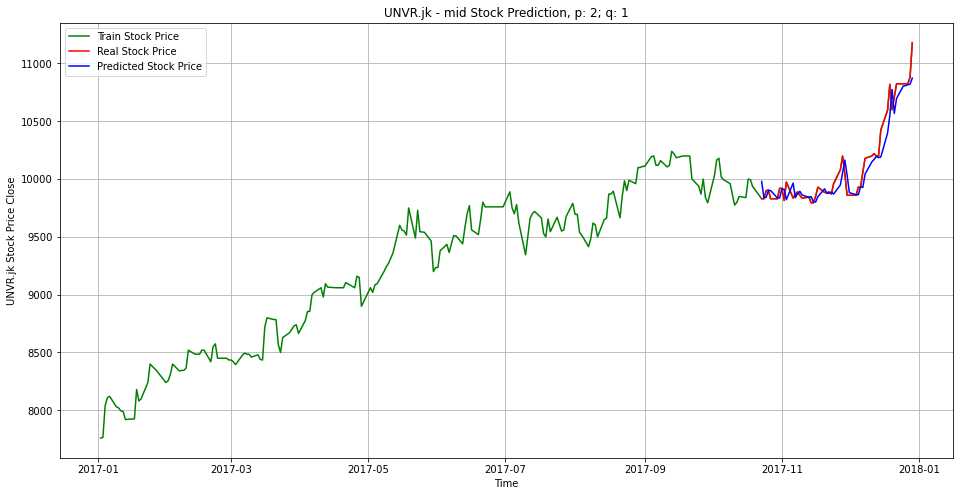

In [133]:
plt.figure(figsize=(16,8))
plt.plot(data.index[:], data[column_dataset_obs], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title(symbol_dataset+ ' - ' + term_status +  ' Stock Prediction, p: '+ str(p) +'; q: '+str(q))
plt.xlabel('Time')
plt.ylabel(symbol_dataset +' Stock Price '+ column_dataset_obs)
plt.legend()
plt.grid(True)
plt.savefig("../results/ARIMA/plots/" + symbol_dataset +'_ARIMA-'+ 
                            term_status + '_p='+ str(p) +'_q='+ str(q) + '.pdf')
plt.show()

In [134]:
# predictions,

## Visualize Test Data The Prediction and Real

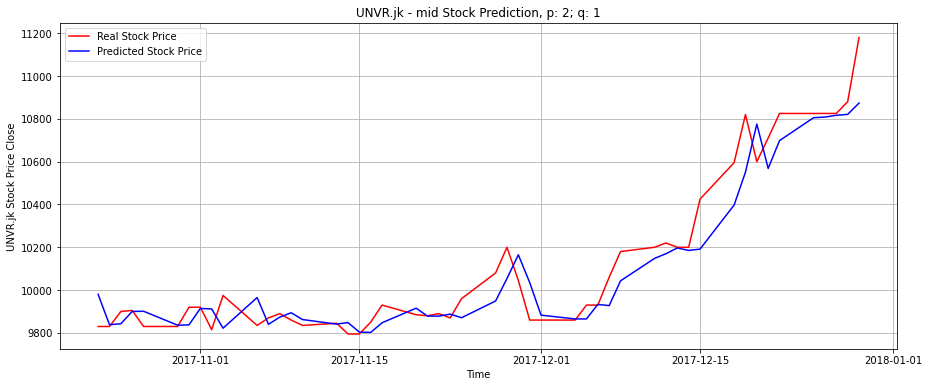

In [135]:
plt.figure()
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title(symbol_dataset+ ' - ' + term_status +' Stock Prediction, p: '+ str(p) +'; q: '+str(q))
plt.xlabel('Time')
plt.ylabel(symbol_dataset +' Stock Price '+ column_dataset_obs)
plt.legend()
plt.grid(True)
plt.show()

In [136]:
price_prediction=predictions

In [137]:
new_date = pd.to_datetime(test_data.index)

## Save as new Dataset

In [138]:
new_data = {'Date': new_date,
            'real_close': y,
           'close_arima': price_prediction}

In [139]:
df_new_data = pd.DataFrame(new_data, columns = ['Date', 'real_close','close_arima'])

In [140]:
df_new_data.to_csv("../results/ARIMA/datasets/" + term_status + "/"+ symbol_dataset
                +'_ARIMA-'+ term_status + '_p='+ str(p) +'_q='+ str(q) + '.csv', index=False)

In [141]:
# df_new_data

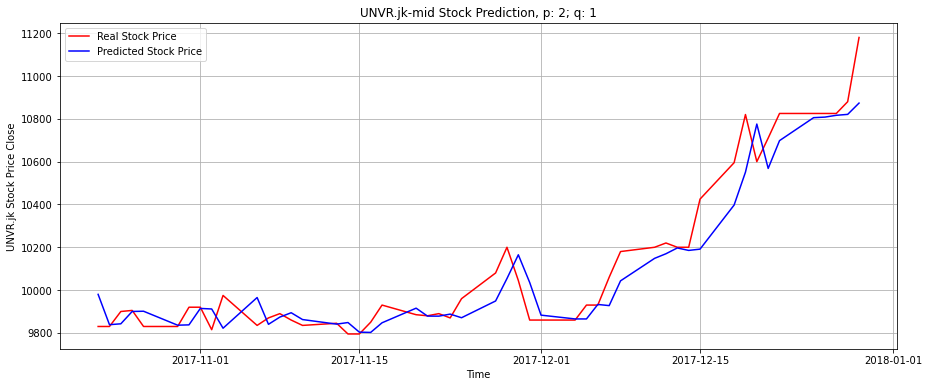

In [142]:
plt.figure()
plt.plot(df_new_data['real_close'], color = 'red', label = 'Real Stock Price')
plt.plot(df_new_data['close_arima'], color = 'blue', label = 'Predicted Stock Price')
plt.title(symbol_dataset+ '-' + term_status +' Stock Prediction, p: '+ str(p) +'; q: '+str(q))
plt.xlabel('Time')
plt.ylabel(symbol_dataset +' Stock Price '+ column_dataset_obs)
plt.legend()
plt.grid(True)
# plt.savefig('arima_model.pdf')
plt.show()

### Report Performance of ARIMA Predictions

In [143]:
# mse = mean_squared_error(y, predictions)
# print('MSE: '+str(mse))
print(symbol_dataset+"-"+term_status)
print('P: ' + str(p))
print('D: ' + str(d))
print('Q: ' + str(q))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+ str("{:.2f}".format(rmse)))
mae = mean_absolute_error(y, predictions)
print('MAE: '+ str("{:.2f}".format(mae)))
mape = mean_absolute_percentage_error(y, predictions)
print('MAPE: '+ str("{:.2f}".format(mape*100)) + ' %')

UNVR.jk-mid
P: 2
D: 1
Q: 1
RMSE: 107.11
MAE: 76.68
MAPE: 0.75 %
